<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU - TIME SERIES 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.0 - EDA 📌
</div>

****
<h1 style= "background:#e6ffff;color:#004d4d"><center>Aquifer</center></h1>

![Aquifer](https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Aquifer_en.svg/350px-Aquifer_en.svg.png)

### Nhập các thư viện cần thiết

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date
warnings.simplefilter('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv('../Datasets/Water_Cleaner_1.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [3]:
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4199 non-null   datetime64[ns]
 1   Rainfall              4199 non-null   float64       
 2   Depth_to_Groundwater  4172 non-null   float64       
 3   Temperature           4199 non-null   float64       
 4   Drainage_Volume       4198 non-null   float64       
 5   River_Hydrometry      4199 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 197.0 KB


In [5]:
df_copy = df.drop(['Date'], axis=1)

### Đồ thị tương quan 

#### Mục đích
1. Hiểu mối quan hệ giữa các biến:

    - Heatmap giúp bạn hình dung mức độ tương quan giữa các biến trong bộ dữ liệu. Tương quan có thể cho biết mối quan hệ giữa hai biến, liệu chúng có di chuyển cùng chiều (tương quan dương) hoặc ngược chiều (tương quan âm) hay không.
2. Phát hiện các mối quan hệ mạnh:

    - Bạn có thể dễ dàng xác định các biến có mối quan hệ mạnh mẽ (cả tích cực và tiêu cực) dựa trên các ô màu sắc đậm trong heatmap. Các ô màu sắc gần giá trị 1 hoặc -1 cho thấy mối tương quan mạnh.
3. Giảm chiều dữ liệu:

    - Nếu có các biến có mối quan hệ mạnh với nhau (gần như trùng lặp thông tin), bạn có thể loại bỏ một trong số chúng để giảm bớt chiều dữ liệu mà không mất nhiều thông tin.
4. Xác định các biến quan trọng cho mô hình:

    - Heatmap giúp bạn xác định các biến có mối tương quan cao với biến mục tiêu (ví dụ, giá nhà, doanh thu, v.v.), từ đó giúp bạn lựa chọn các biến quan trọng để xây dựng mô hình dự đoán.

#### Lý do Sử dụng

1. **Trực quan hóa mối quan hệ phức tạp**:
   - Heatmap giúp bạn trực quan hóa mối quan hệ phức tạp giữa nhiều biến trong dữ liệu một cách đơn giản và dễ hiểu. Bạn có thể nhanh chóng nhận ra các mẫu và mối quan hệ mà không cần phải xem xét từng cặp biến một cách thủ công.

2. **Phát hiện đa cộng tuyến**:
   - Đa cộng tuyến xảy ra khi hai hoặc nhiều biến độc lập có mối tương quan cao với nhau, gây ra vấn đề trong các mô hình hồi quy. Heatmap giúp bạn phát hiện và xử lý vấn đề này.

3. **Hỗ trợ phân tích khám phá dữ liệu (EDA)**:
   - Trong giai đoạn phân tích khám phá dữ liệu, heatmap là công cụ hữu ích để hiểu sâu hơn về cấu trúc và mối quan hệ của dữ liệu trước khi tiến hành các bước tiếp theo như tiền xử lý, xây dựng mô hình và tối ưu hóa.

4. **Hiệu quả và dễ sử dụng**:
   - Heatmap dễ tạo và trực quan hóa bằng các công cụ thư viện như Seaborn và Matplotlib trong Python. Điều này giúp tiết kiệm thời gian và công sức cho nhà phân tích dữ liệu.


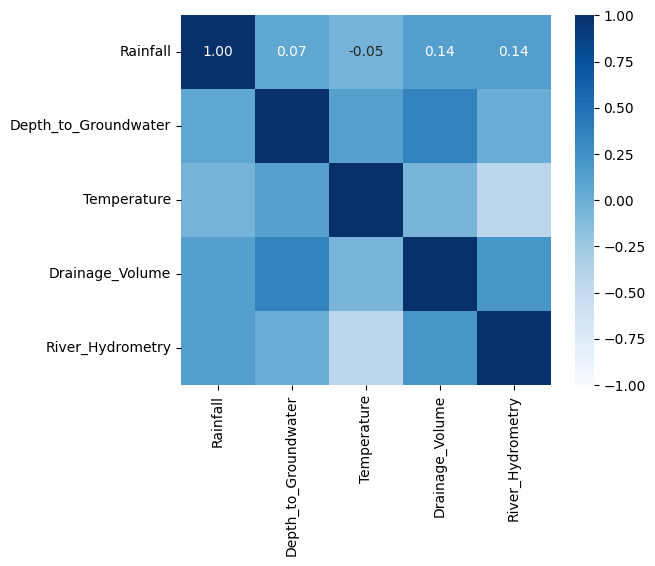

In [6]:
# plot heartmap to find correlation in the dataset features
sns.heatmap(df_copy.corr(),annot=True, fmt='.2f',vmin=-1, vmax=1, center=0, cmap='Blues', square=True)
plt.show()


- Đối với Aquifer Petrignago, các đặc điểm có tương quan dương cao là `Depth_to_Groundwater` - `Drainage_Volume`, `Drainage_Volume` - `River_Hydrometry`, các đặc điểm có tương quan âm cao là `Temperature` - `River_Hydrometry`.

### Phân tích đặc trưng: Biểu đồ phân phối tích lũy (CDF), biểu đồ hộp (Boxplot), và biểu đồ tần suất (Histogram) cho từng đặc trưng trong DataFrame.

#### Mục đích và Lý do Sử dụng

1. **Biểu đồ phân phối tích lũy (CDF)**:
   - **Mục đích**: Hiển thị phân phối tích lũy của dữ liệu để dễ dàng nhận biết tỷ lệ phần trăm các giá trị dưới một ngưỡng nhất định.
   - **Lý do sử dụng**: Giúp hiểu rõ hơn về sự phân bố của dữ liệu và phát hiện các giá trị ngoại lệ hoặc những giá trị đặc biệt. CDF hữu ích trong việc so sánh sự phân phối của các tập dữ liệu khác nhau.

2. **Biểu đồ hộp (Boxplot)**:
   - **Mục đích**: Cung cấp một cái nhìn tổng quan về sự phân phối của dữ liệu thông qua các giá trị trung vị, tứ phân vị, và các giá trị ngoại lệ.
   - **Lý do sử dụng**: Giúp xác định các giá trị ngoại lệ, độ chênh lệch của dữ liệu và sự bất đối xứng của phân phối. Boxplot rất hữu ích trong việc so sánh các nhóm dữ liệu khác nhau.

3. **Biểu đồ tần suất (Histogram)**:
   - **Mục đích**: Hiển thị phân bố tần suất của các giá trị trong dữ liệu.
   - **Lý do sử dụng**: Giúp hiểu rõ hơn về hình dạng phân phối của dữ liệu, xác định các vùng tập trung giá trị và các khoảng giá trị phổ biến. Histogram là công cụ trực quan cơ bản để phân tích dữ liệu đơn biến.

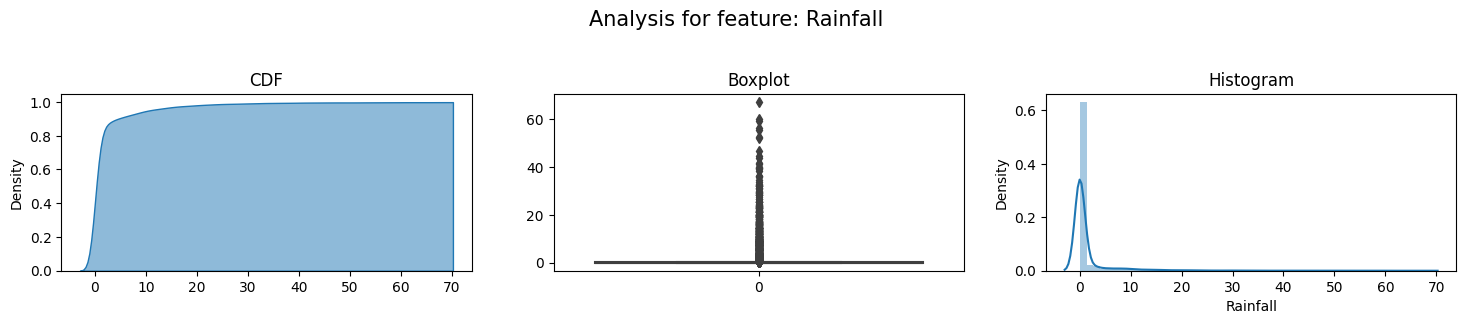

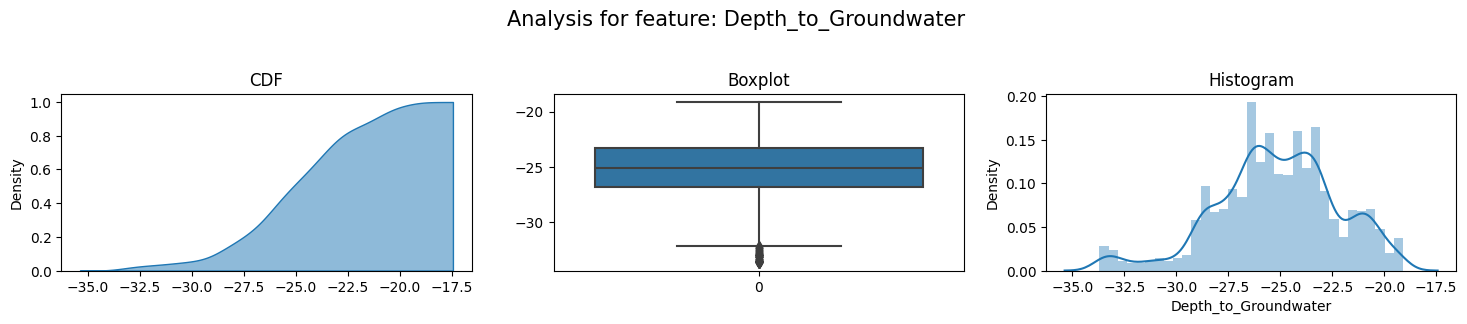

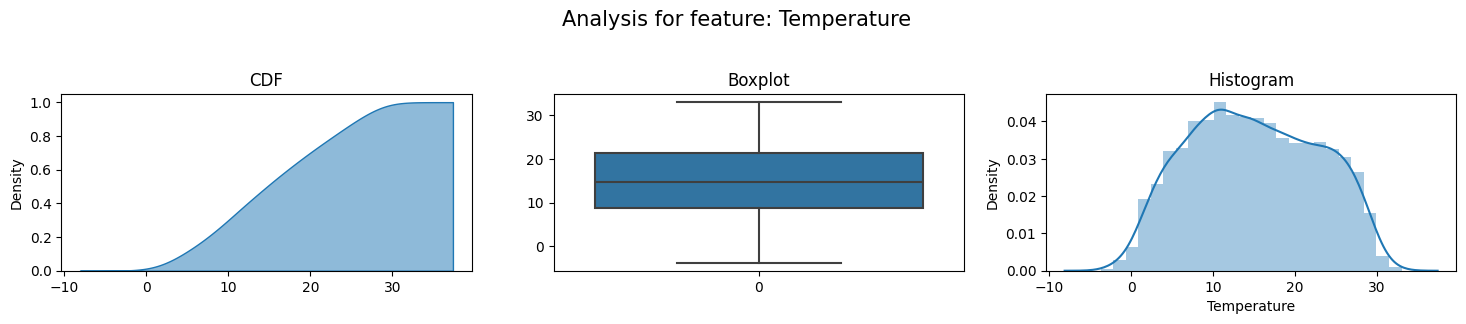

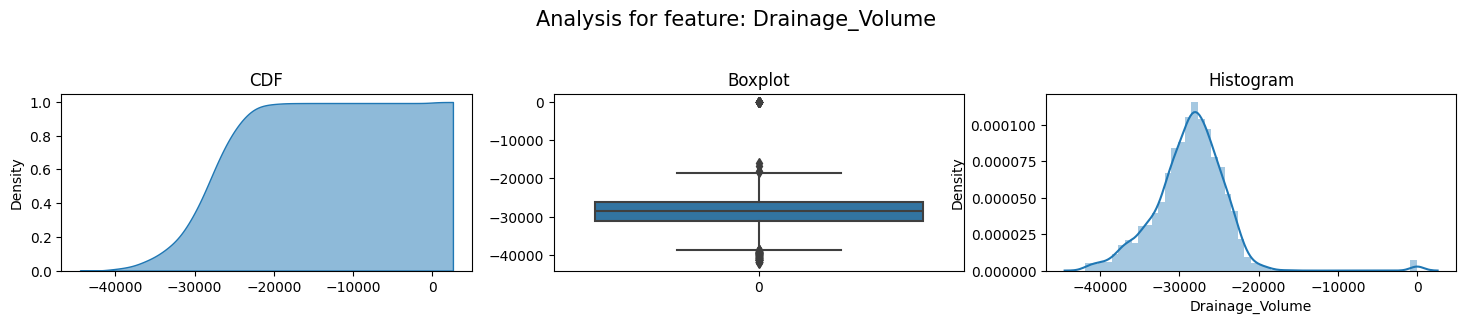

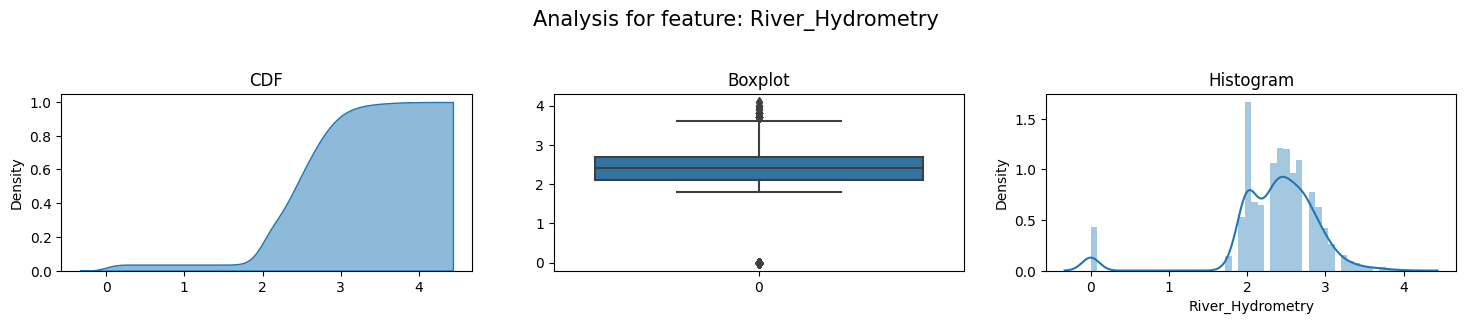

In [7]:
for col in df_copy.columns:
        fig, axes = plt.subplots(1, 3, figsize = (18,3))
        fig.suptitle('Analysis for feature: '+col,fontsize=15)
        fig.subplots_adjust(top=0.7)
        sns.kdeplot(np.array(df_copy[col]), cumulative= True, fill=True,palette="crest",alpha=.5, ax = axes[0])
        sns.boxplot(df_copy[col], ax = axes[1])
        sns.distplot(df_copy[col], ax = axes[2])
        
        #set titles for each plot
        axes[0].set_title('CDF')
        axes[1].set_title('Boxplot')
        axes[2].set_title('Histogram')
        plt.show()

Quan sát:
- Trong Aquifer Petrignano, tất cả các tính năng được phân bổ hợp lý và không có nhiều ngoại lệ ngoại trừ `Rainfall`, `Drainage_Volume`, `River_Hydrometry`.

### Phân tích đặc trưng mục tiêu

**Độ sâu đến mực nước ngầm**

#### Mục đích

1. **Theo dõi thay đổi của độ sâu đến mực nước ngầm theo thời gian**:
   - Biểu đồ giúp bạn hiểu sâu hơn về xu hướng thay đổi của độ sâu đến mực nước ngầm qua các quan sát trên một khoảng thời gian nhất định.

2. **Phát hiện các mẫu và xu hướng**:
   - Bằng cách quan sát biểu đồ, bạn có thể phát hiện các mẫu, chu kỳ hoặc xu hướng trong dữ liệu độ sâu đến mực nước ngầm, giúp dự đoán và ước lượng các biến động trong tương lai.

3. **Đánh giá tác động của yếu tố bên ngoài**:
   - Biểu đồ có thể giúp bạn xác định tác động của các yếu tố bên ngoài như thời tiết, môi trường hoặc hoạt động con người đối với mực nước ngầm.

#### Lý do Sử dụng

Sử dụng biểu đồ đường (line plot). Biểu đồ này được sử dụng để biểu diễn sự biến thiên của một biến theo thời gian, trong trường hợp này là độ sâu đến mực nước ngầm qua các quan sát được ghi lại theo thời gian.

1. **Trực quan hóa dữ liệu**:
   - Biểu đồ là công cụ trực quan giúp bạn dễ dàng hiểu và phân tích dữ liệu độ sâu đến mực nước ngầm.

2. **Thông báo và truyền đạt thông tin**:
   - Biểu đồ giúp truyền đạt thông tin một cách dễ hiểu và hấp dẫn hơn so với dữ liệu số hoặc bảng số liệu.

3. **Hỗ trợ quyết định**:
   - Dựa trên biểu đồ, bạn có thể đưa ra quyết định về việc quản lý tài nguyên nước, dự báo nguy cơ lụt lội hoặc phát triển các chiến lược quản lý mực nước.


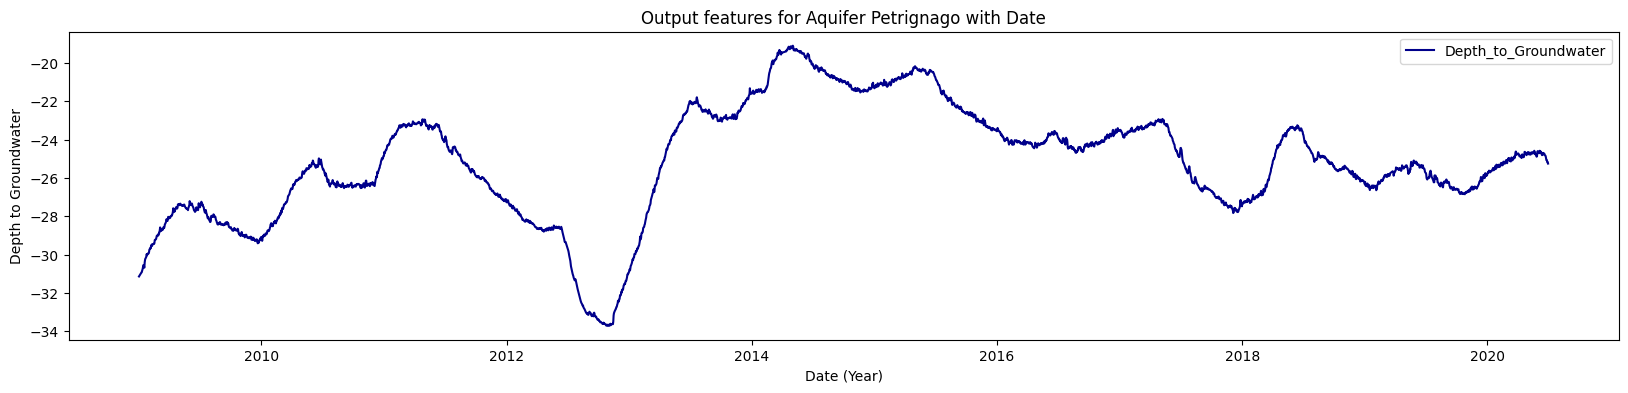

In [8]:
plt.figure(figsize=(20, 4))
plt.title('Output features for Aquifer Petrignago with Date')

# Handling NaN values by replacing them with np.inf (so they don't appear on the plot)
sns.lineplot(x=df['Date'], y=df['Depth_to_Groundwater'].replace({np.nan: np.inf}),
             label='Depth_to_Groundwater', color='darkblue')

plt.xlabel('Date (Year)')
plt.ylabel('Depth to Groundwater')
plt.legend()
plt.show()

Quan sát:

- Độ sâu của nước ngầm năm 2006 là -24 m vào năm 2006 và được ghi nhận ở mức tương tự sau năm 2020.
- Độ sâu tối đa đối với nước ngầm được ghi nhận vào năm 2013 lên tới -34 m.
- Độ sâu tối thiểu đối với nước ngầm được ghi nhận vào năm 2015 là -20 m.

**Lượng mưa**

#### Mục đích

1. **Theo dõi thay đổi của độ sâu đến mực nước ngầm theo thời gian**:
   - Biểu đồ giúp bạn hiểu sâu hơn về xu hướng thay đổi của độ sâu đến mực nước ngầm qua các quan sát trên một khoảng thời gian nhất định.

2. **Phát hiện các mẫu và xu hướng**:
   - Bằng cách quan sát biểu đồ, bạn có thể phát hiện các mẫu, chu kỳ hoặc xu hướng trong dữ liệu độ sâu đến mực nước ngầm, giúp dự đoán và ước lượng các biến động trong tương lai.

3. **Đánh giá tác động của yếu tố bên ngoài**:
   - Biểu đồ có thể giúp bạn xác định tác động của các yếu tố bên ngoài như thời tiết, môi trường hoặc hoạt động con người đối với mực nước ngầm.

#### Lý do Sử dụng

1. **Trực quan hóa dữ liệu**:
   - Biểu đồ là công cụ trực quan giúp bạn dễ dàng hiểu và phân tích dữ liệu độ sâu đến mực nước ngầm.

2. **Thông báo và truyền đạt thông tin**:
   - Biểu đồ giúp truyền đạt thông tin một cách dễ hiểu và hấp dẫn hơn so với dữ liệu số hoặc bảng số liệu.

3. **Hỗ trợ quyết định**:
   - Dựa trên biểu đồ, bạn có thể đưa ra quyết định về việc quản lý tài nguyên nước, dự báo nguy cơ lụt lội hoặc phát triển các chiến lược quản lý mực nước.

Text(0.5, 0, 'Date (Year)')

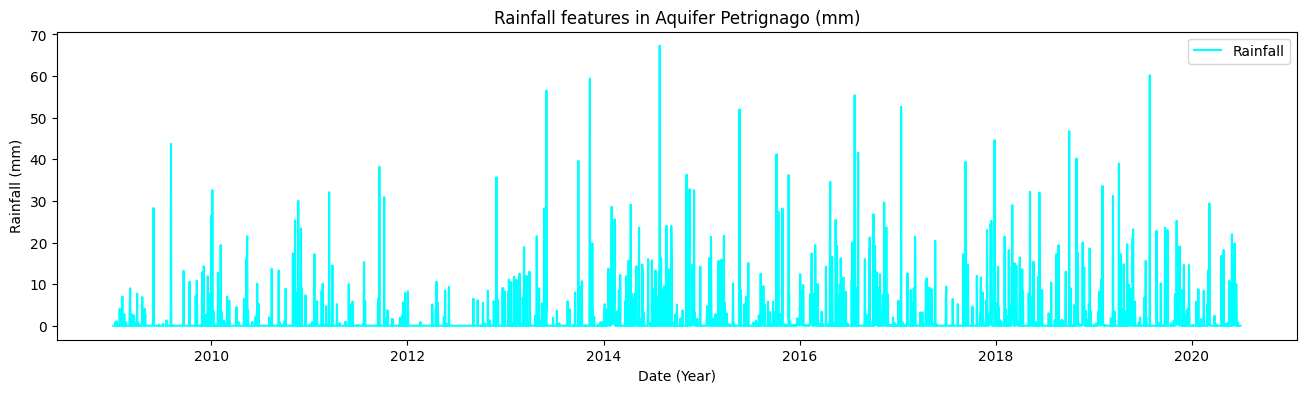

In [9]:
# Rainfall features in Aquifer Petrignago
plt.figure(figsize=(16, 4))
plt.title('Rainfall features in Aquifer Petrignago (mm)')
sns.lineplot(x=pd.to_datetime(df['Date']),y=df['Rainfall'].replace({np.nan : np.inf}),
    label='Rainfall',color='aqua')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Date (Year)')

Quan sát:

- Lượng mưa cao nhất được ghi nhận vào năm 2014 ở mức 70 mm và thấp nhất vào năm 2012 ở mức 10 mm.
- Xu hướng giảm dần được quan sát từ năm 2019 đến năm 2020.

**Nhiệt độ**

#### Mục đích

1. **Theo dõi Sự Biến Động của Nhiệt Độ theo Thời Gian**:
   - Biểu đồ giúp theo dõi sự biến động của nhiệt độ qua các quan sát được ghi lại theo thời gian (trong trường hợp này là theo năm).

2. **Phát Hiện Các Mô hình hoặc Xu hướng Trong Dữ liệu**:
   - Bằng cách quan sát biểu đồ, bạn có thể phát hiện các mô hình hoặc xu hướng trong dữ liệu nhiệt độ, như chu kỳ mùa vụ, biến động ngẫu nhiên hoặc xu hướng tăng/giảm dần.

3. **Đánh Giá Tác Động của Các Yếu Tố Bên Ngoài**:
   - Biểu đồ cho phép bạn đánh giá tác động của các yếu tố bên ngoài như thời tiết, biến đổi khí hậu hoặc các yếu tố môi trường khác đối với nhiệt độ.

#### Lý do Sử Dụng Biểu Đồ Đường

1. **Trực Quan và Dễ Hiểu**:
   - Biểu đồ đường là một công cụ trực quan và dễ hiểu để biểu diễn sự biến động của dữ liệu theo thời gian. Đường biểu diễn sự liên tục và mạch lạc của dữ liệu, giúp dễ dàng nhận biết các xu hướng và biến động.

2. **Theo Dõi Thay Đổi theo Thời Gian**:
   - Biểu đồ đường thích hợp để theo dõi sự biến đổi của một biến liên tục (trong trường hợp này là nhiệt độ) theo thời gian.

3. **Xác Định Chu Kỳ và Xu Hướng**:
   - Biểu đồ đường giúp xác định chu kỳ mùa vụ, xu hướng tăng/giảm dần hoặc biến động ngẫu nhiên trong dữ liệu nhiệt độ.

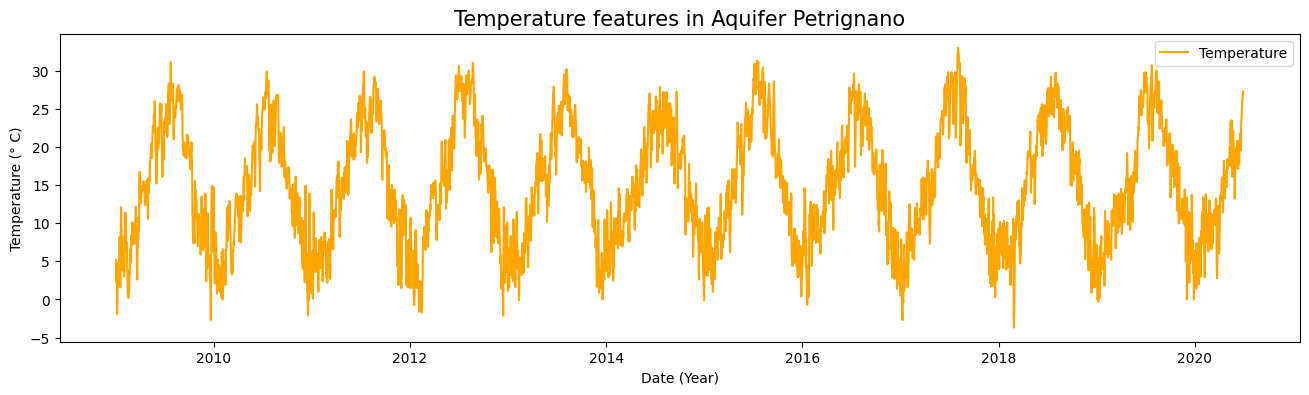

In [10]:
plt.figure(figsize=(16, 4))
plt.title('Temperature features in Aquifer Petrignano', fontsize=15)

# Plot Temperature
sns.lineplot(x=df['Date'], y=df['Temperature'].replace({np.nan: np.inf}),
             label='Temperature', color='orange')
plt.xlabel('Date (Year)')
plt.ylabel('Temperature (° C)')
plt.legend()
plt.show()


Quan sát:

- Nhiệt độ dao động từ -5 đến 30 độ cho đến năm 2018.
- Năm 2019 đến 2020 tương đối lạnh hơn từ 0 đến 25 độ. Ngoài ra, năm 2015 đến 2016 nhiệt độ ở Petrignano giảm xuống

**Thể tích xả**

#### Mục Đích

1. **Theo Dõi Biến Động của Thể Tích Xả theo Thời Gian**:
   - Biểu đồ giúp theo dõi sự biến động của thể tích xả qua các quan sát được ghi lại theo thời gian (trong trường hợp này là theo năm).

2. **Phát Hiện Các Mô hình hoặc Xu Hướng Trong Dữ Liệu**:
   - Bằng cách quan sát biểu đồ, bạn có thể phát hiện các mô hình hoặc xu hướng trong dữ liệu thể tích xả, như chu kỳ mùa vụ, biến động ngẫu nhiên hoặc xu hướng tăng/giảm dần.

3. **Đánh Giá Tác Động của Các Yếu Tố Bên Ngoài**:
   - Biểu đồ cho phép bạn đánh giá tác động của các yếu tố bên ngoài như thời tiết, môi trường, hoặc hoạt động con người đối với thể tích xả.

#### Lý Do Sử Dụng Biểu Đồ Đường

1. **Trực Quan và Dễ Hiểu**:
   - Biểu đồ đường là một công cụ trực quan và dễ hiểu để biểu diễn sự biến động của dữ liệu theo thời gian. Đường biểu diễn sự liên tục và mạch lạc của dữ liệu, giúp dễ dàng nhận biết các xu hướng và biến động.

2. **Theo Dõi Thay Đổi Theo Thời Gian**:
   - Biểu đồ đường thích hợp để theo dõi sự biến đổi của một biến liên tục (trong trường hợp này là thể tích xả) theo thời gian.

3. **Xác Định Chu Kỳ và Xu Hướng**:
   - Biểu đồ đường giúp xác định chu kỳ mùa vụ, xu hướng tăng/giảm dần hoặc biến động ngẫu nhiên trong dữ liệu thể tích xả.

Text(0.5, 0, 'Date (Year)')

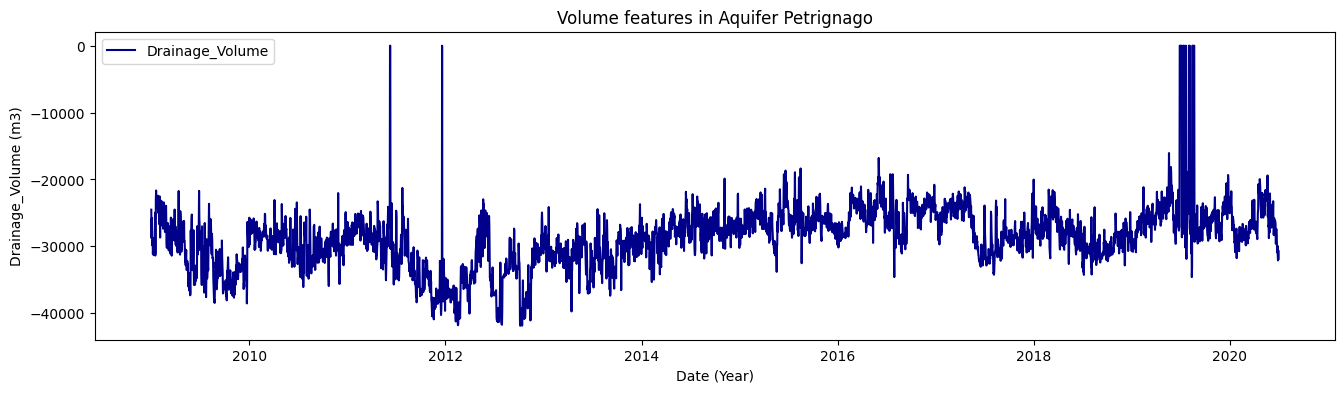

In [11]:
#Volume features in Aquifer Petrignago
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(df['Date']),y=df['Drainage_Volume'].replace({np.nan : np.inf}),
    label='Drainage_Volume',color='darkblue')
plt.title('Volume features in Aquifer Petrignago')
plt.ylabel("Drainage_Volume (m3)")
plt.xlabel('Date (Year)')

Quan sát:

- Thể tích gần như ổn định qua các năm trong khoảng -3000 mét khối.

**Tỷ trọng kế chỉ mực nước ngầm**

#### Mục Đích

1. **Theo Dõi Biến Động của Tỷ Trọng Kế Chỉ Mực Nước Ngầm theo Thời Gian**:
   - Biểu đồ giúp theo dõi sự biến động của tỷ trọng kế chỉ mực nước ngầm qua các quan sát được ghi lại theo thời gian (trong trường hợp này là theo năm).

2. **Phát Hiện Các Mô hình hoặc Xu Hướng Trong Dữ Liệu**:
   - Bằng cách quan sát biểu đồ, bạn có thể phát hiện các mô hình hoặc xu hướng trong dữ liệu tỷ trọng kế chỉ mực nước ngầm, như chu kỳ mùa vụ, biến động ngẫu nhiên hoặc xu hướng tăng/giảm dần.

3. **Đánh Giá Tác Động của Các Yếu Tố Bên Ngoài**:
   - Biểu đồ cho phép bạn đánh giá tác động của các yếu tố bên ngoài như mưa, dòng chảy của sông hoặc hoạt động con người đối với tỷ trọng kế chỉ mực nước ngầm.

#### Lý Do Sử Dụng Biểu Đồ Đường

1. **Trực Quan và Dễ Hiểu**:
   - Biểu đồ đường là một công cụ trực quan và dễ hiểu để biểu diễn sự biến động của dữ liệu theo thời gian. Đường biểu diễn sự liên tục và mạch lạc của dữ liệu, giúp dễ dàng nhận biết các xu hướng và biến động.

2. **Theo Dõi Thay Đổi Theo Thời Gian**:
   - Biểu đồ đường thích hợp để theo dõi sự biến đổi của một biến liên tục (trong trường hợp này là tỷ trọng kế chỉ mực nước ngầm) theo thời gian.

3. **Xác Định Chu Kỳ và Xu Hướng**:
   - Biểu đồ đường giúp xác định chu kỳ mùa vụ, xu hướng tăng/giảm dần hoặc biến động ngẫu nhiên trong dữ liệu tỷ trọng kế chỉ mực nước ngầm.

Text(0.5, 0, 'Date (Year)')

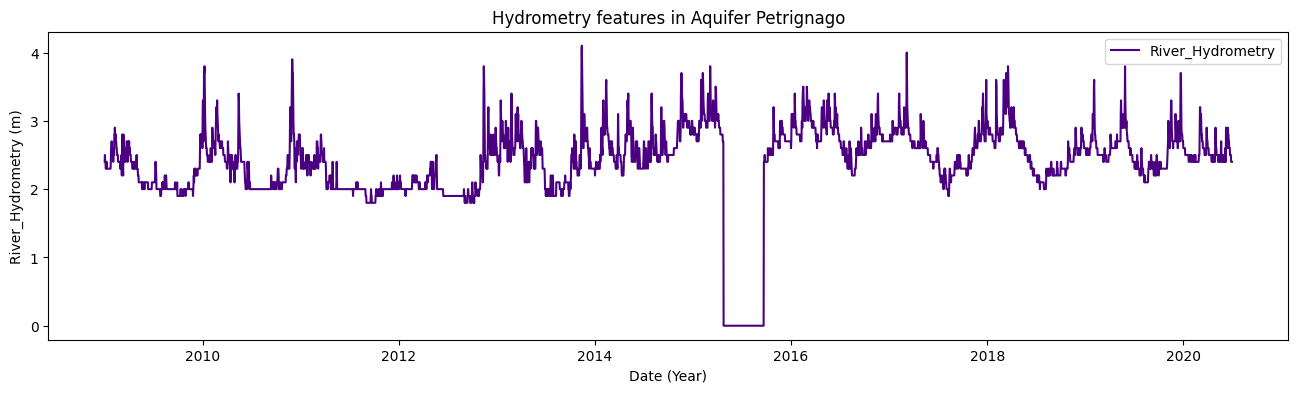

In [12]:
# Hydrometry features in Aquifer Petrignago
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(df['Date']),y=df['River_Hydrometry'].replace({np.nan : np.inf}),
    label='River_Hydrometry',color='indigo')
plt.title('Hydrometry features in Aquifer Petrignago')
plt.ylabel('River_Hydrometry (m)')
plt.xlabel('Date (Year)')

Quan sát:

- Đo tỷ trọng 3 m được quan sát tại Petrignano vào năm 2020.
- Đôi khi phạm vi cao lên tới 4 m.

### Phân tích trung bình đặc trưng mục tiêu theo năm

#### Mục Đích

1. **Hiểu Sự Thay Đổi Theo Thời Gian**: Biểu đồ đường cho phép phân tích sự biến đổi của các đặc trưng mục tiêu (rainfall, temperature, volume, hydrometry, và depth to ground water) qua các năm.

2. **Xác Định Xu Hướng và Chu Kỳ**: Giúp xác định xu hướng tăng hoặc giảm của các đặc trưng theo thời gian, cũng như phát hiện các chu kỳ mùa vụ hoặc biến động ngẫu nhiên.

3. **Đánh Giá Tác Động của Các Yếu Tố Khác**: Biểu đồ cung cấp cái nhìn tổng quan về sự thay đổi của các đặc trưng mục tiêu và tác động của các yếu tố bên ngoài như thời tiết, môi trường, và hoạt động con người.

#### Lý Do Sử Dụng Biểu Đồ Đường

1. **Trực Quan và Dễ Hiểu**: Biểu đồ đường là một cách trực quan và dễ hiểu để biểu diễn sự biến đổi của các đặc trưng theo thời gian.

2. **Phân Tích Tính Liên Tục**: Biểu đồ đường thích hợp cho việc phân tích các đặc trưng mục tiêu có tính liên tục, như lượng mưa, nhiệt độ, thể tích, tỷ trọng kế chỉ mực nước ngầm, và độ sâu đến mực nước ngầm.

3. **So Sánh Dễ Dàng**: Cho phép so sánh giữa các đặc trưng khác nhau trong cùng một biểu đồ, giúp nhận biết mối quan hệ giữa chúng và hiểu rõ hơn về sự biến động trong dữ liệu.

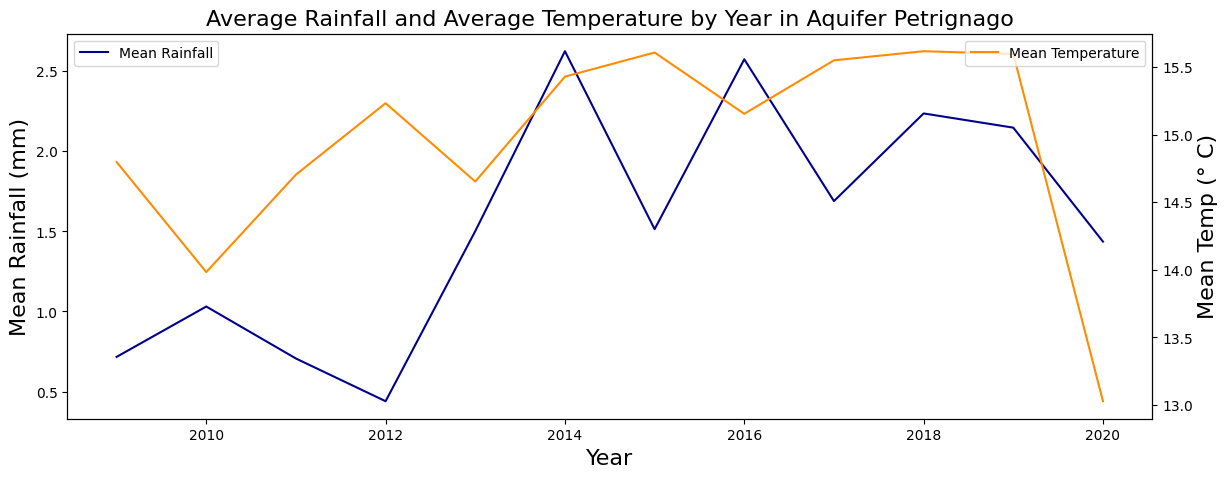

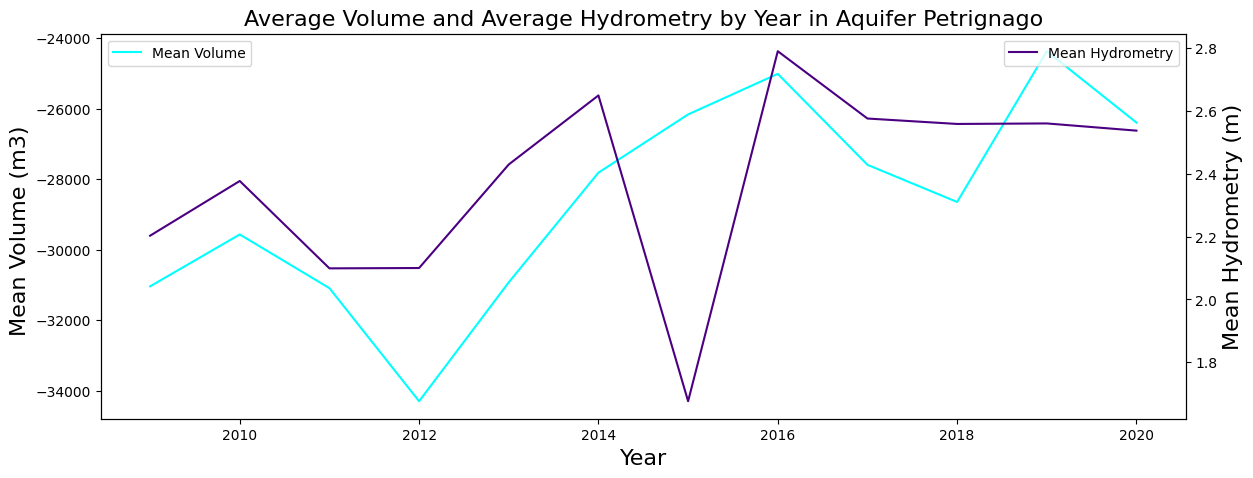

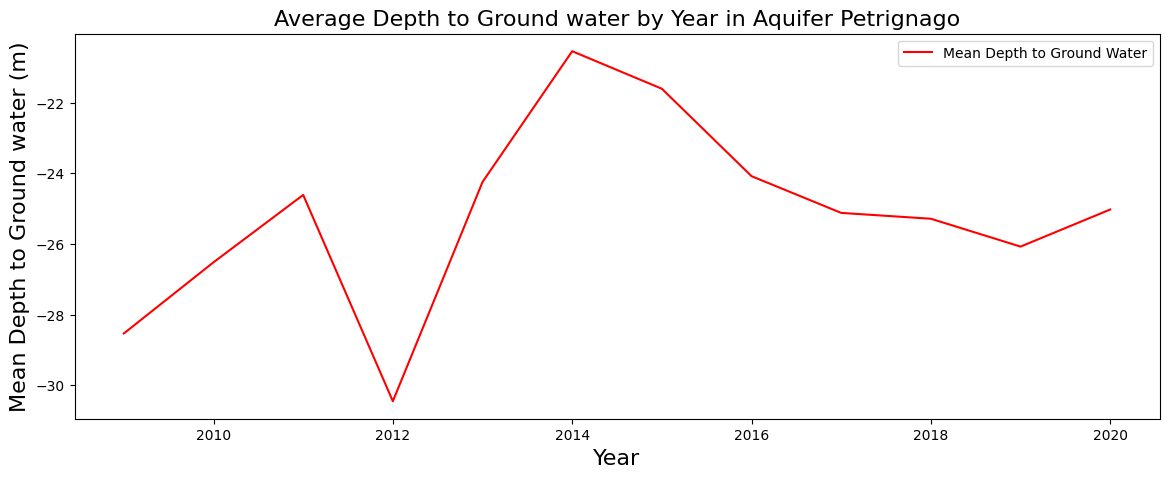

In [13]:
# Aquifer Petrignago yearly 
aquifer_petrignago_yearly = df.copy()
aquifer_petrignago_yearly['Year'] = pd.to_datetime(aquifer_petrignago_yearly['Date']).dt.year.values
aquifer_petrignago_yearly = aquifer_petrignago_yearly.groupby('Year').mean()
aquifer_petrignago_yearly['mean_rainfall'] = aquifer_petrignago_yearly[['Rainfall']].mean(axis=1)
aquifer_petrignago_yearly['mean_temp'] = aquifer_petrignago_yearly[['Temperature']].mean(axis=1)
aquifer_petrignago_yearly['mean_volume'] = aquifer_petrignago_yearly[['Drainage_Volume']].mean(axis=1)
aquifer_petrignago_yearly['mean_hydrometry'] = aquifer_petrignago_yearly[['River_Hydrometry']].mean(axis=1)
aquifer_petrignago_yearly['mean_depth_gwater'] = aquifer_petrignago_yearly[['Depth_to_Groundwater']].mean(axis=1)
aquifer_petrignago_yearly = aquifer_petrignago_yearly.reset_index()


# Plot for rainfall, temperature, volume, hydrometry and the depth to ground water

fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall (mm)', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_petrignago_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp (° C)', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_petrignago_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend(loc = 'upper right')
plt.show()


fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Volume and Average Hydrometry by Year in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume (m3) ', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_petrignago_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry (m)', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_hydrometry', data = aquifer_petrignago_yearly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
plt.title('Average Depth to Ground water by Year in Aquifer Petrignago', fontsize=16)
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_petrignago_yearly, color='red',label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water (m)', fontsize=16)
plt.legend()
plt.show()

Quan sát:

- Khi lượng mưa trung bình thấp và nhiệt độ trung bình cao, khi thể tích trung bình sâu và tỷ trọng nước vừa phải, đó là khi độ sâu trung bình của nước ngầm là cao nhất. Giống như năm 2008 và 2012, nó sâu nhất ở mức -32 m.

### Phân tích trung bình đặc trưng mục tiêu theo tháng

#### Mục Đích

1. **Hiểu Sự Biến Động Của Các Đặc Trưng Theo Tháng**: Biểu đồ đường cho phép phân tích sự biến động của các đặc trưng mục tiêu (rainfall, temperature, volume, hydrometry, và depth to ground water) theo các tháng trong năm.

2. **Phát Hiện Xu Hướng Mùa Vụ và Biến Động Theo Mùa**: Giúp xác định xu hướng tăng/giảm của các đặc trưng theo từng tháng trong năm và phát hiện các biến động theo mùa.

3. **So Sánh Sự Thay Đổi Giữa Các Đặc Trưng**: Cho phép so sánh sự biến động của các đặc trưng khác nhau trong cùng một biểu đồ, giúp nhận biết mối quan hệ giữa chúng và hiểu rõ hơn về sự biến động trong dữ liệu.

#### Lý Do Sử Dụng Biểu Đồ Đường

1. **Trực Quan và Dễ Hiểu**: Biểu đồ đường là một cách trực quan và dễ hiểu để biểu diễn sự biến động của các đặc trưng theo thời gian, trong trường hợp này là theo từng tháng trong năm.

2. **Phân Tích Chi Tiết Theo Thời Gian**: Biểu đồ đường thích hợp cho việc phân tích sự biến động của các đặc trưng mục tiêu theo tháng, giúp hiểu rõ hơn về tình hình thay đổi và tác động của các yếu tố khác nhau.

3. **Dễ Dàng Đưa Ra Quyết Định**: Thông qua việc quan sát và phân tích biểu đồ đường, người dùng có thể dễ dàng đưa ra quyết định và các chiến lược thích hợp cho dự báo và quản lý dữ liệu.


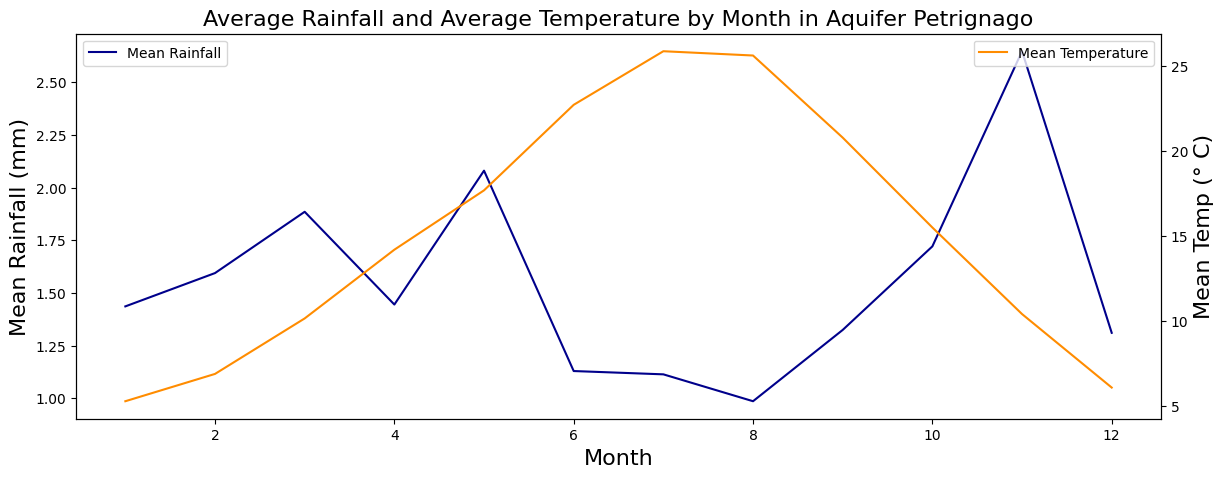

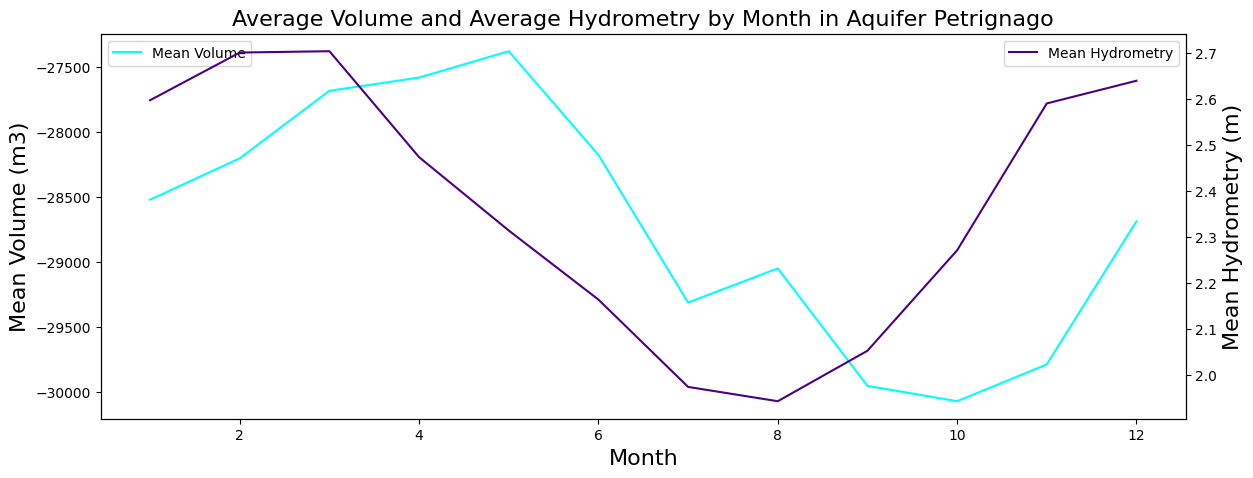

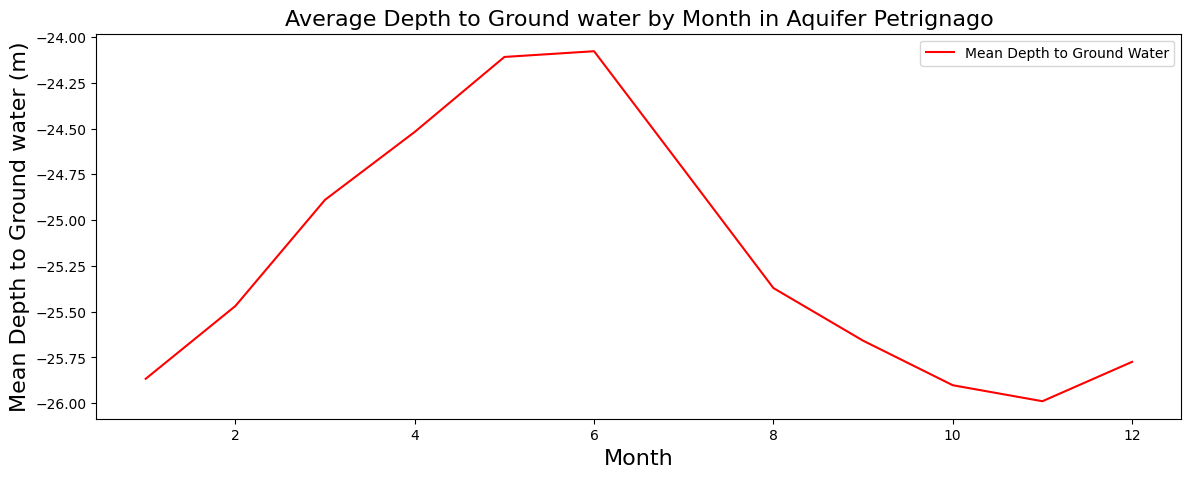

In [14]:
# Aquifer Petrignago monthly
aquifer_petrignago_monthly = df.copy()
aquifer_petrignago_monthly['Month'] = pd.to_datetime(aquifer_petrignago_monthly['Date']).dt.month.values
aquifer_petrignago_monthly = aquifer_petrignago_monthly.groupby('Month').mean()
aquifer_petrignago_monthly['mean_rainfall'] = aquifer_petrignago_monthly[['Rainfall']].mean(axis=1)
aquifer_petrignago_monthly['mean_temp'] = aquifer_petrignago_monthly[['Temperature']].mean(axis=1)
aquifer_petrignago_monthly['mean_volume'] = aquifer_petrignago_monthly[['Drainage_Volume']].mean(axis=1)
aquifer_petrignago_monthly['mean_hydrometry'] = aquifer_petrignago_monthly[['River_Hydrometry']].mean(axis=1)
aquifer_petrignago_monthly['mean_depth_gwater'] = aquifer_petrignago_monthly[['Depth_to_Groundwater']].mean(axis=1)

aquifer_petrignago_monthly = aquifer_petrignago_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall (mm)', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_petrignago_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp (° C)', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_petrignago_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Volume and Average Hydrometry by Month in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume (m3)', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_petrignago_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry (m)', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_hydrometry', data = aquifer_petrignago_monthly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
plt.title('Average Depth to Ground water by Month in Aquifer Petrignago', fontsize=16)
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_petrignago_monthly, color='red',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water (m)', fontsize=16)
plt.legend()
plt.show()

Quan sát:

- Lượng mưa trung bình cao, nhiệt độ trung bình thấp, tỷ trọng nước trung bình tăng và thể tích trung bình giảm tạo ra độ sâu trung bình sâu nhất đối với nước ngầm vào các tháng 10, 11 và 12.